In [3]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load all datasets
print("Loading Railway Datasets...")
trains = pd.read_csv('railway_dataset/trains.csv')
timetable = pd.read_csv('railway_dataset/timetable.csv')
stations = pd.read_csv('railway_dataset/stations.csv')
delay_logs = pd.read_csv('railway_dataset/delay_logs.csv')
weather_data = pd.read_csv('railway_dataset/weather_data.csv')
controllers = pd.read_csv('railway_dataset/controllers.csv')
events = pd.read_csv('railway_dataset/events.csv')
train_routes = pd.read_csv('railway_dataset/train_routes.csv')
platform_assignments = pd.read_csv('railway_dataset/platform_assignments.csv')

# Convert datetime columns
datetime_cols = ['timestamp', 'arrival_time', 'departure_time', 'reported_by', 'resolved_timestamp']
for df_name, df in [('timetable', timetable), ('delay_logs', delay_logs), 
                    ('weather_data', weather_data), ('events', events), 
                    ('platform_assignments', platform_assignments)]:
    for col in df.columns:
        if any(dt_col in col for dt_col in datetime_cols):
            df[col] = pd.to_datetime(df[col], errors='ignore')

print("✅ Data loaded successfully!")

Loading Railway Datasets...
✅ Data loaded successfully!


In [5]:
# Basic Dataset Overview and Statistics
print("="*60)
print("RAILWAY DATASET OVERVIEW")
print("="*60)

datasets = {
    'Trains': trains,
    'Timetable': timetable, 
    'Stations': stations,
    'Delay Logs': delay_logs,
    'Weather Data': weather_data,
    'Controllers': controllers,
    'Events': events,
    'Train Routes': train_routes,
    'Platform Assignments': platform_assignments
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"  Shape: {df.shape}")
    print(f"  Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Key metrics
print(f"\n📊 KEY METRICS:")
print(f"Total Trains: {len(trains)}")
print(f"Total Stations: {len(stations)}")
print(f"Total Routes: {len(train_routes)}")
print(f"Total Delays Recorded: {len(delay_logs)}")
print(f"Date Range: {timetable['arrival_time'].min()} to {timetable['arrival_time'].max()}")

RAILWAY DATASET OVERVIEW

Trains:
  Shape: (75, 7)
  Memory: 0.02 MB

Timetable:
  Shape: (459, 17)
  Memory: 0.20 MB

Stations:
  Shape: (150, 9)
  Memory: 0.05 MB

Delay Logs:
  Shape: (66, 8)
  Memory: 0.02 MB

Weather Data:
  Shape: (50400, 8)
  Memory: 9.67 MB

Controllers:
  Shape: (20, 5)
  Memory: 0.01 MB

Events:
  Shape: (66, 7)
  Memory: 0.02 MB

Train Routes:
  Shape: (75, 8)
  Memory: 0.02 MB

Platform Assignments:
  Shape: (390, 7)
  Memory: 0.05 MB

📊 KEY METRICS:
Total Trains: 75
Total Stations: 150
Total Routes: 75
Total Delays Recorded: 66
Date Range: 2025-09-01 00:45:00 to 2025-09-05 15:02:59



TRAFFIC DENSITY ANALYSIS

🚄 TRAFFIC BY CORRIDOR:
  Golden_Quadrilateral: 164 train movements
  East_West: 159 train movements
  North_South: 136 train movements

🏪 TOP 10 BUSIEST STATIONS:
  MRT (Kolkata Terminus): 11 movements
  XUT (Vadodara Junction): 10 movements
  KOK (Surat Junction): 10 movements
  CPX (Chennai Terminus): 9 movements
  AJM (Hyderabad Central): 9 movements
  OAR (Gandhinagar Junction): 9 movements
  WTN (Kharagpur Cantt): 9 movements
  UWE (Malda Cantt): 8 movements
  KYU (Agra Road): 8 movements
  XFO (Dehradun Cantt): 8 movements


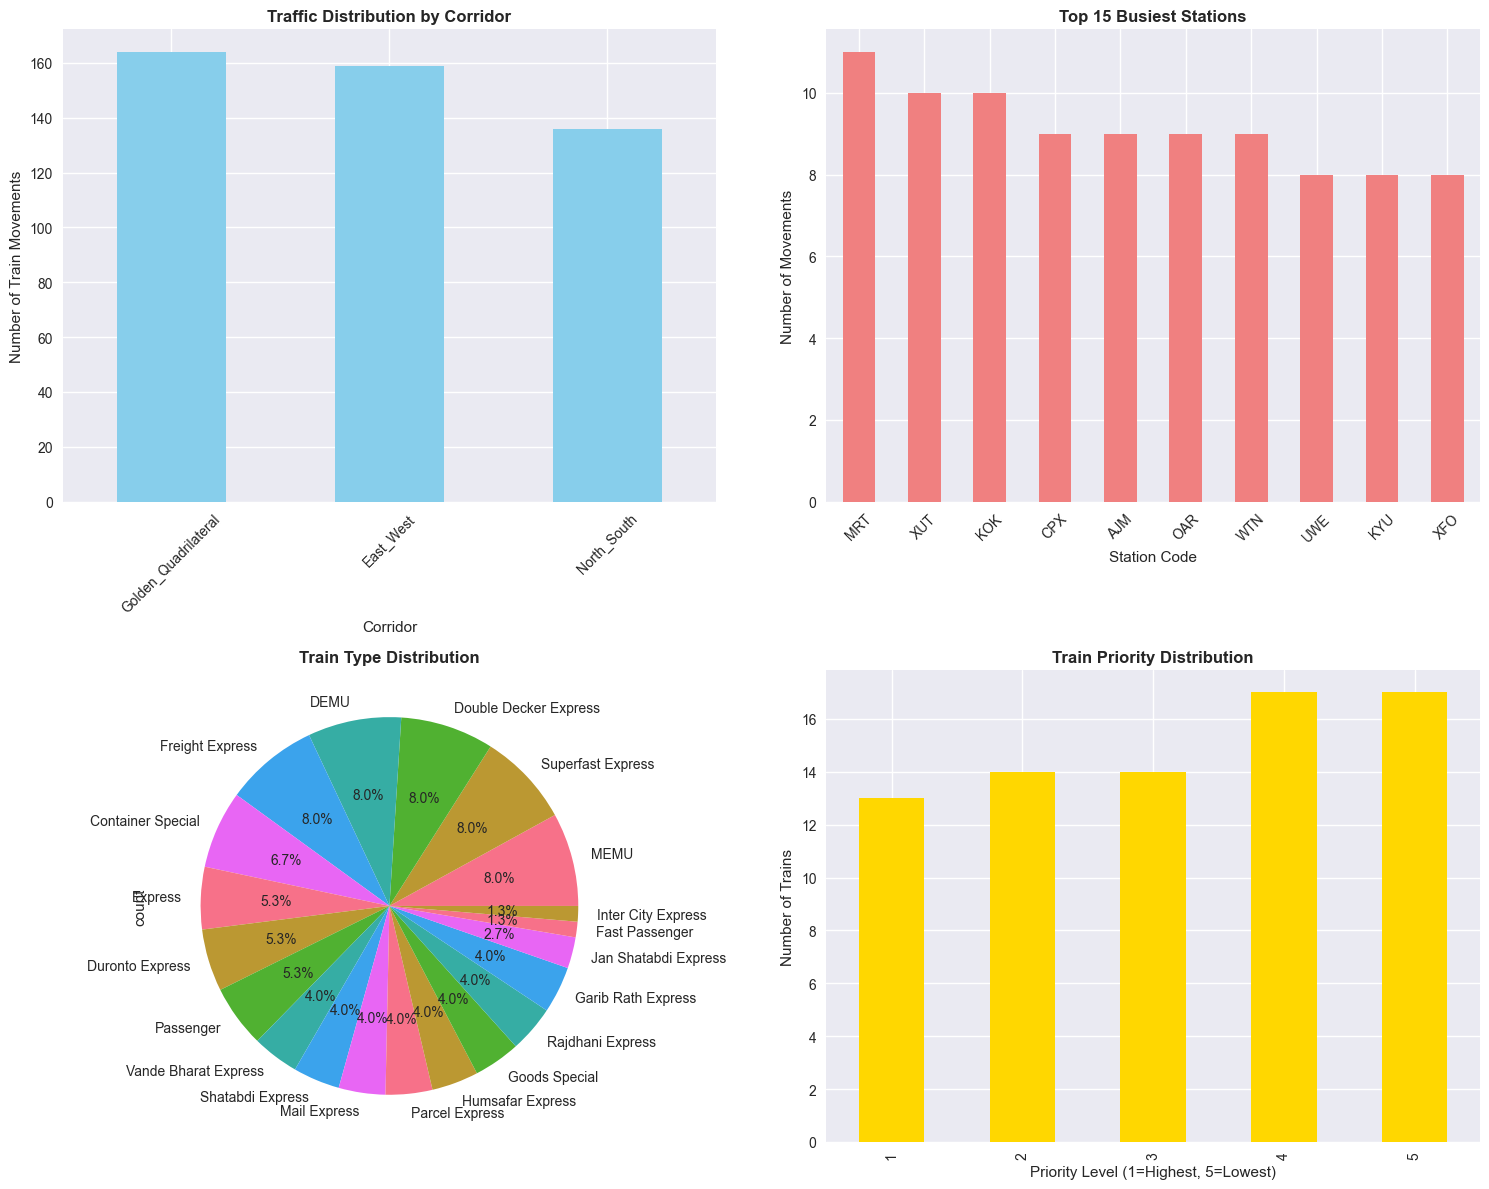

In [6]:
# Traffic Analysis by Corridors and Sections
print("\n" + "="*60)
print("TRAFFIC DENSITY ANALYSIS")
print("="*60)

# Corridor-wise traffic distribution
corridor_traffic = timetable['corridor'].value_counts()
print("\n🚄 TRAFFIC BY CORRIDOR:")
for corridor, count in corridor_traffic.items():
    print(f"  {corridor}: {count} train movements")

# Station-wise traffic (arrivals + departures)
station_traffic = timetable['station_code'].value_counts().head(10)
print(f"\n🏪 TOP 10 BUSIEST STATIONS:")
for station, count in station_traffic.items():
    station_name = stations[stations['station_code'] == station]['station_name'].iloc[0] if len(stations[stations['station_code'] == station]) > 0 else 'Unknown'
    print(f"  {station} ({station_name}): {count} movements")

# Train type distribution
train_types = trains['train_type'].value_counts()
priority_dist = trains['priority'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Corridor traffic
corridor_traffic.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Traffic Distribution by Corridor', fontweight='bold')
axes[0,0].set_xlabel('Corridor')
axes[0,0].set_ylabel('Number of Train Movements')
axes[0,0].tick_params(axis='x', rotation=45)

# Station traffic top 15
station_traffic.head(15).plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Top 15 Busiest Stations', fontweight='bold')
axes[0,1].set_xlabel('Station Code')
axes[0,1].set_ylabel('Number of Movements')
axes[0,1].tick_params(axis='x', rotation=45)

# Train types
train_types.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Train Type Distribution', fontweight='bold')

# Priority distribution
priority_dist.plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Train Priority Distribution', fontweight='bold')
axes[1,1].set_xlabel('Priority Level (1=Highest, 5=Lowest)')
axes[1,1].set_ylabel('Number of Trains')

plt.tight_layout()
plt.show()


DELAY ANALYSIS & BOTTLENECK IDENTIFICATION

⏰ DELAY STATISTICS:
  Total Delays: 66
  Average Delay: 38.4 minutes
  Maximum Delay: 135 minutes

🔍 DELAY REASONS:
  Heavy_Rain_medium: 9 incidents (13.6%)
  Light_Rain_low: 7 incidents (10.6%)
  Light_Rain_medium: 5 incidents (7.6%)
  Heatwave_low: 5 incidents (7.6%)
  Dense_Fog_low: 5 incidents (7.6%)
  ENGINE_FAILURE: 5 incidents (7.6%)
  SIGNAL_FAILURE: 5 incidents (7.6%)
  TRACK_BLOCKAGE: 5 incidents (7.6%)

🚨 TOP BOTTLENECK STATIONS:
  EEF (Tadepalligudem Halt): 3 delays, avg 39.0 min
  QFP (Ratlam Cantt): 2 delays, avg 29.0 min
  XFE (Bhopal Cantt): 2 delays, avg 37.5 min
  OXM (Narasaraopet Halt): 2 delays, avg 28.0 min
  QXU (Kavali Cantt): 2 delays, avg 33.5 min
  FMG (Ludhiana Cantt): 2 delays, avg 77.5 min
  TUF (Dehradun Cantt): 2 delays, avg 22.5 min
  BCN (Erode Road): 2 delays, avg 16.5 min
  XUT (Vadodara Junction): 2 delays, avg 45.0 min
  XGO (Saharsa Road): 2 delays, avg 41.0 min


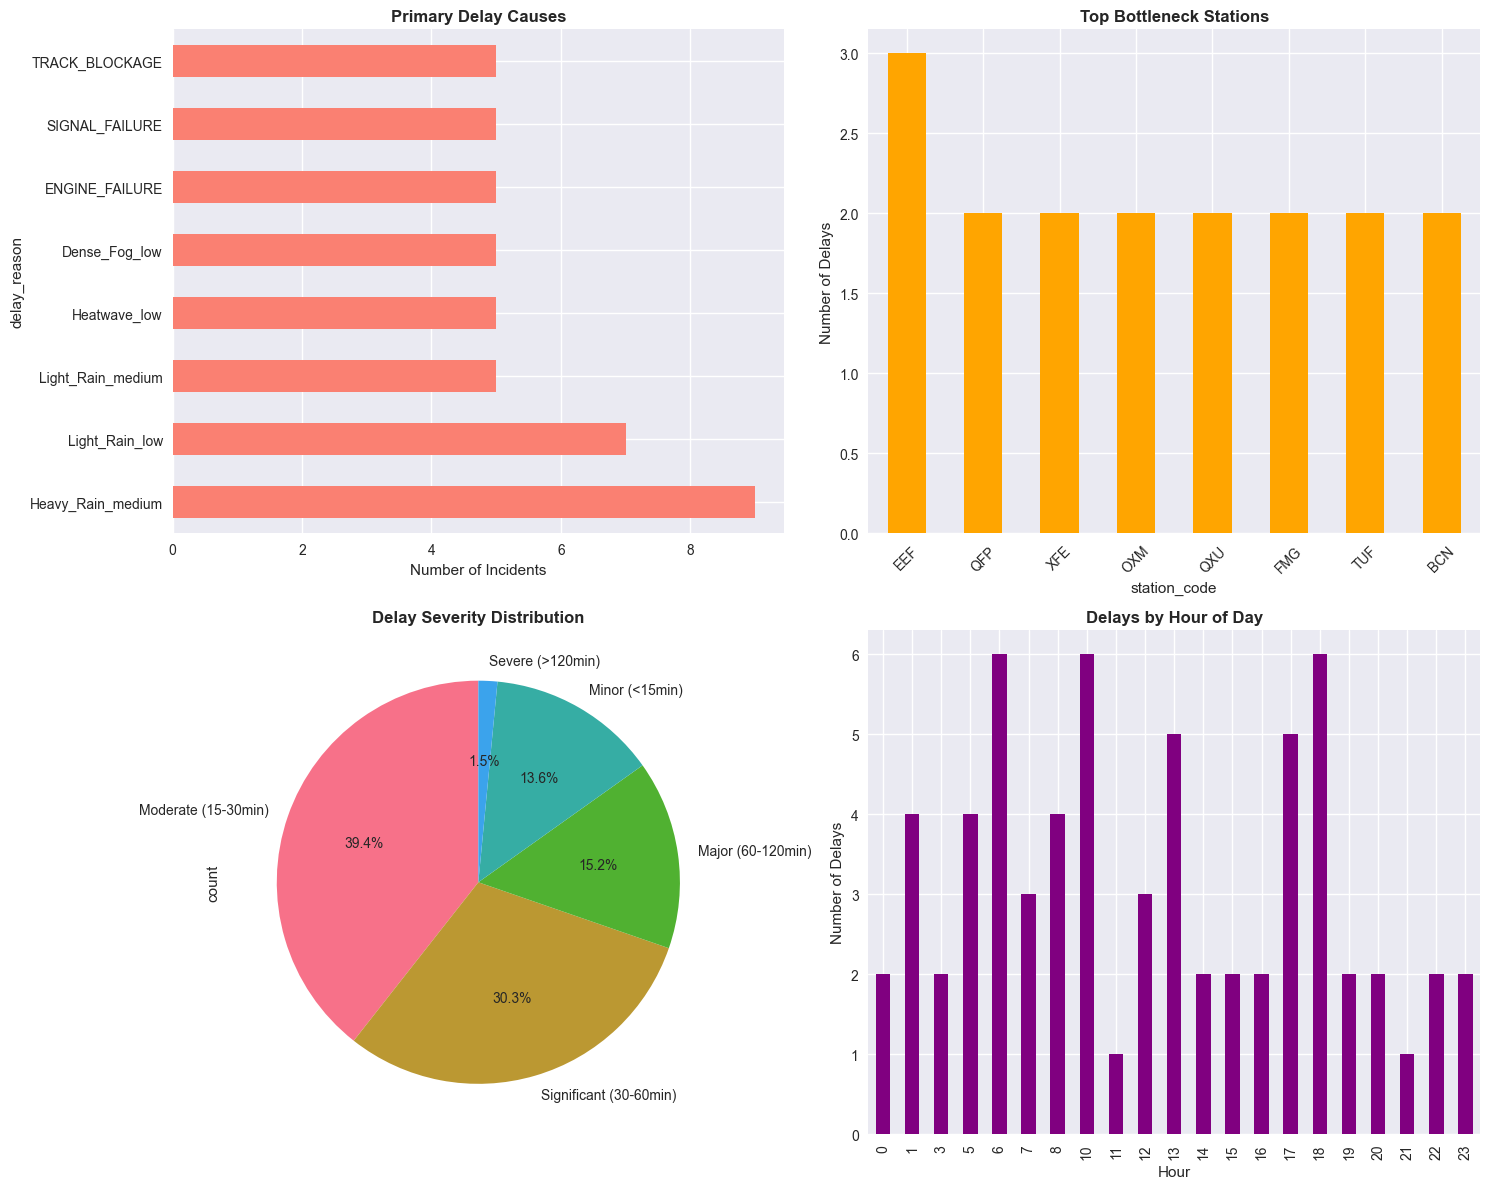

In [7]:
# Delay Analysis and Bottleneck Identification
print("\n" + "="*60)
print("DELAY ANALYSIS & BOTTLENECK IDENTIFICATION")
print("="*60)

# Delay statistics
avg_delay = delay_logs['delay_minutes'].mean()
max_delay = delay_logs['delay_minutes'].max()
total_delays = len(delay_logs)

print(f"\n⏰ DELAY STATISTICS:")
print(f"  Total Delays: {total_delays}")
print(f"  Average Delay: {avg_delay:.1f} minutes")
print(f"  Maximum Delay: {max_delay} minutes")

# Delay by reason
delay_reasons = delay_logs['delay_reason'].value_counts()
print(f"\n🔍 DELAY REASONS:")
for reason, count in delay_reasons.head(8).items():
    print(f"  {reason}: {count} incidents ({count/total_delays*100:.1f}%)")

# Bottleneck stations (most delays)
bottleneck_stations = delay_logs['station_code'].value_counts().head(10)
print(f"\n🚨 TOP BOTTLENECK STATIONS:")
for station, count in bottleneck_stations.items():
    station_name = stations[stations['station_code'] == station]['station_name'].iloc[0] if len(stations[stations['station_code'] == station]) > 0 else 'Unknown'
    avg_delay_at_station = delay_logs[delay_logs['station_code'] == station]['delay_minutes'].mean()
    print(f"  {station} ({station_name}): {count} delays, avg {avg_delay_at_station:.1f} min")

# Delay severity distribution
delay_bins = [0, 15, 30, 60, 120, float('inf')]
delay_labels = ['Minor (<15min)', 'Moderate (15-30min)', 'Significant (30-60min)', 
                'Major (60-120min)', 'Severe (>120min)']
delay_logs['delay_category'] = pd.cut(delay_logs['delay_minutes'], bins=delay_bins, labels=delay_labels)
delay_severity = delay_logs['delay_category'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Delay reasons
delay_reasons.head(8).plot(kind='barh', ax=axes[0,0], color='salmon')
axes[0,0].set_title('Primary Delay Causes', fontweight='bold')
axes[0,0].set_xlabel('Number of Incidents')

# Bottleneck stations
bottleneck_stations.head(8).plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Top Bottleneck Stations', fontweight='bold')
axes[0,1].set_ylabel('Number of Delays')
axes[0,1].tick_params(axis='x', rotation=45)

# Delay severity
delay_severity.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Delay Severity Distribution', fontweight='bold')

# Hourly delay pattern
delay_logs['hour'] = pd.to_datetime(delay_logs['timestamp']).dt.hour
hourly_delays = delay_logs.groupby('hour')['delay_minutes'].agg(['count', 'mean'])
hourly_delays['count'].plot(kind='bar', ax=axes[1,1], color='purple')
axes[1,1].set_title('Delays by Hour of Day', fontweight='bold')
axes[1,1].set_xlabel('Hour')
axes[1,1].set_ylabel('Number of Delays')

plt.tight_layout()
plt.show()


WEATHER IMPACT ANALYSIS

🌤️ WEATHER CONDITIONS:
  Clear: 23442 observations (46.5%)
  Light_Rain: 10495 observations (20.8%)
  Dense_Fog: 7505 observations (14.9%)
  Heavy_Rain: 5820 observations (11.5%)
  Heatwave: 2107 observations (4.2%)
  Cyclone: 551 observations (1.1%)
  Dust_Storm: 480 observations (1.0%)

🌧️ WEATHER-RELATED DELAYS (46 total):
  Heavy_Rain_medium: 9 incidents, avg 47.0 min delay
  Light_Rain_low: 7 incidents, avg 24.9 min delay
  Heatwave_low: 5 incidents, avg 17.4 min delay
  Light_Rain_medium: 5 incidents, avg 21.0 min delay
  Dense_Fog_low: 5 incidents, avg 39.4 min delay
  Heavy_Rain_high: 3 incidents, avg 87.7 min delay
  Dust_Storm_low: 3 incidents, avg 28.3 min delay
  Dense_Fog_medium: 3 incidents, avg 58.7 min delay
  Dense_Fog_high: 2 incidents, avg 108.0 min delay
  Heavy_Rain_low: 1 incidents, avg 40.0 min delay
  Heatwave_high: 1 incidents, avg 18.0 min delay
  Cyclone_medium: 1 incidents, avg 57.0 min delay
  Light_Rain_high: 1 incidents, avg 19.0

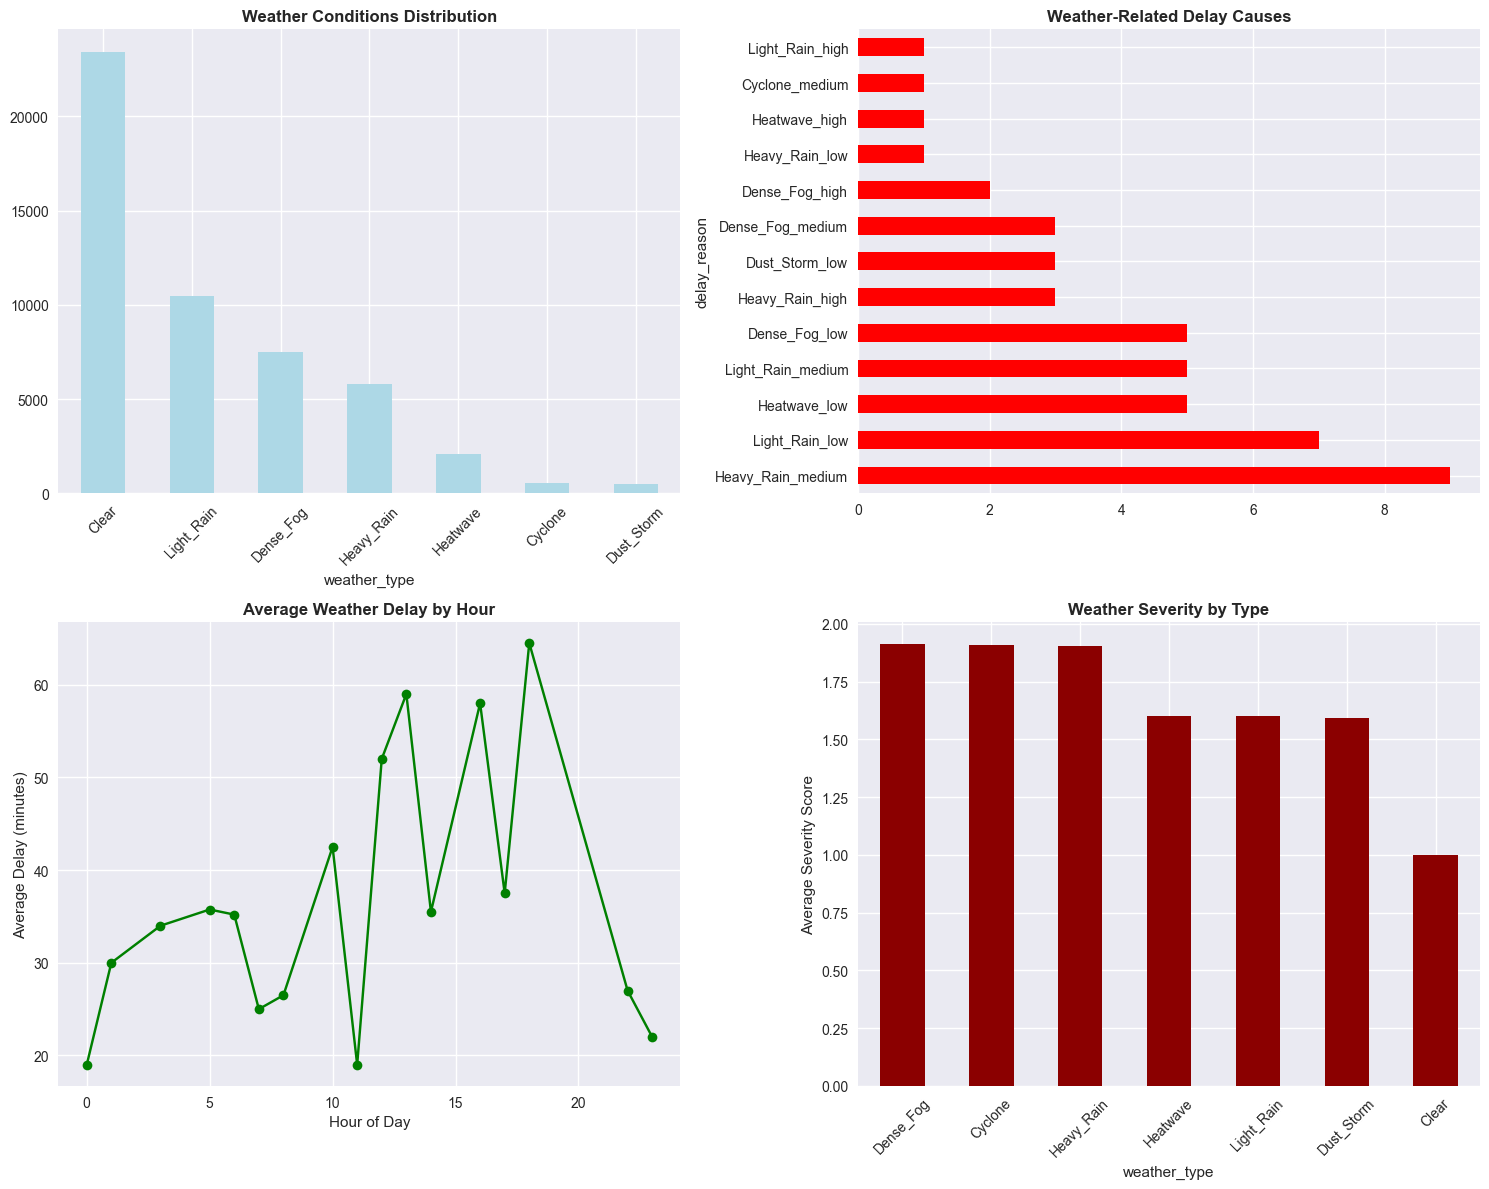

In [8]:
# Weather Impact Analysis
print("\n" + "="*60)
print("WEATHER IMPACT ANALYSIS")
print("="*60)

# Weather condition distribution
weather_conditions = weather_data['weather_type'].value_counts()
print(f"\n🌤️ WEATHER CONDITIONS:")
for condition, count in weather_conditions.items():
    print(f"  {condition}: {count} observations ({count/len(weather_data)*100:.1f}%)")

# Weather-related delays
weather_delays = delay_logs[delay_logs['delay_reason'].str.contains('Rain|Fog|Heatwave|Storm|Cyclone', na=False)]
weather_delay_reasons = weather_delays['delay_reason'].value_counts()

print(f"\n🌧️ WEATHER-RELATED DELAYS ({len(weather_delays)} total):")
for reason, count in weather_delay_reasons.items():
    avg_delay = weather_delays[weather_delays['delay_reason'] == reason]['delay_minutes'].mean()
    print(f"  {reason}: {count} incidents, avg {avg_delay:.1f} min delay")

# Corridor vulnerability to weather
corridor_weather_delays = weather_delays.merge(timetable[['train_code', 'corridor']].drop_duplicates(), 
                                               on='train_code', how='left')
corridor_weather_impact = corridor_weather_delays.groupby('corridor').agg({
    'delay_minutes': ['count', 'mean']
}).round(1)

print(f"\n🗺️ CORRIDOR WEATHER VULNERABILITY:")
for corridor in corridor_weather_impact.index:
    if pd.notna(corridor):
        count = corridor_weather_impact.loc[corridor, ('delay_minutes', 'count')]
        avg = corridor_weather_impact.loc[corridor, ('delay_minutes', 'mean')]
        print(f"  {corridor}: {count} weather delays, avg {avg} min")

# Weather severity impact
weather_severity_impact = weather_delays.groupby('delay_reason')['delay_minutes'].agg(['count', 'mean', 'max']).sort_values('mean', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Weather conditions
weather_conditions.plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Weather Conditions Distribution', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# Weather delay reasons
weather_delay_reasons.plot(kind='barh', ax=axes[0,1], color='red')
axes[0,1].set_title('Weather-Related Delay Causes', fontweight='bold')

# Monthly weather impact (using hour as proxy for temporal analysis)
weather_delays['hour'] = pd.to_datetime(weather_delays['timestamp']).dt.hour
weather_hourly = weather_delays.groupby('hour')['delay_minutes'].agg(['count', 'mean'])
weather_hourly['mean'].plot(kind='line', ax=axes[1,0], marker='o', color='green')
axes[1,0].set_title('Average Weather Delay by Hour', fontweight='bold')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Average Delay (minutes)')

# Severity vs Impact
severity_map = {'low': 1, 'medium': 2, 'high': 3}
weather_data['severity_num'] = weather_data['severity'].map(severity_map)
severity_impact = weather_data.groupby('weather_type')['severity_num'].mean().sort_values(ascending=False)
severity_impact.plot(kind='bar', ax=axes[1,1], color='darkred')
axes[1,1].set_title('Weather Severity by Type', fontweight='bold')
axes[1,1].set_ylabel('Average Severity Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Controller Workload and Performance Analysis
print("\n" + "="*60)
print("CONTROLLER WORKLOAD ANALYSIS")
print("="*60)

# Controller delay resolution performance
controller_performance = delay_logs.groupby('reported_by').agg({
    'delay_minutes': ['count', 'mean'],
    'delay_id': 'count'
}).round(2)
controller_performance.columns = ['delays_handled', 'avg_delay_duration', 'total_incidents']

print(f"\n👨‍💼 CONTROLLER PERFORMANCE (Top 10 by incidents handled):")
top_controllers = controller_performance.nlargest(10, 'total_incidents')
for controller in top_controllers.index:
    incidents = int(top_controllers.loc[controller, 'total_incidents'])
    avg_delay = top_controllers.loc[controller, 'avg_delay_duration']
    print(f"  {controller}: {incidents} incidents, avg {avg_delay:.1f} min delay")

# Zone-wise controller distribution if available
if 'zone' in controllers.columns:
    zone_controllers = controllers['zone'].value_counts()
    print(f"\n🗺️ CONTROLLERS BY ZONE:")
    for zone, count in zone_controllers.items():
        print(f"  {zone}: {count} controllers")

# Delay resolution time analysis
delay_logs['resolution_time'] = pd.to_datetime(delay_logs['resolved_timestamp']) - pd.to_datetime(delay_logs['timestamp'])
delay_logs['resolution_minutes'] = delay_logs['resolution_time'].dt.total_seconds() / 60

resolution_stats = delay_logs['resolution_minutes'].describe()
print(f"\n⏱️ DELAY RESOLUTION TIME STATISTICS:")
print(f"  Average resolution time: {resolution_stats['mean']:.1f} minutes")
print(f"  Median resolution time: {resolution_stats['50%']:.1f} minutes")
print(f"  Fastest resolution: {resolution_stats['min']:.1f} minutes")
print(f"  Slowest resolution: {resolution_stats['max']:.1f} minutes")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Controller workload
top_controllers['total_incidents'].plot(kind='bar', ax=axes[0,0], color='teal')
axes[0,0].set_title('Controller Workload (Top 10)', fontweight='bold')
axes[0,0].set_ylabel('Incidents Handled')
axes[0,0].tick_params(axis='x', rotation=45)

# Average delay by controller
top_controllers['avg_delay_duration'].plot(kind='bar', ax=axes[0,1], color='coral')
axes[0,1].set_title('Average Delay Duration by Controller', fontweight='bold')
axes[0,1].set_ylabel('Average Delay (minutes)')
axes[0,1].tick_params(axis='x', rotation=45)

# Resolution time distribution
delay_logs['resolution_minutes'].hist(bins=20, ax=axes[1,0], color='lightgreen', alpha=0.7)
axes[1,0].set_title('Resolution Time Distribution', fontweight='bold')
axes[1,0].set_xlabel('Resolution Time (minutes)')
axes[1,0].set_ylabel('Frequency')

# Controller efficiency (incidents/avg_delay ratio)
controller_efficiency = top_controllers['total_incidents'] / top_controllers['avg_delay_duration']
controller_efficiency.sort_values(ascending=False).plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Controller Efficiency Score', fontweight='bold')
axes[1,1].set_ylabel('Incidents/Avg_Delay_Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Train Priority Impact and Schedule Performance
print("\n" + "="*60)
print("TRAIN PRIORITY & SCHEDULE PERFORMANCE")
print("="*60)

# Merge timetable with trains for priority analysis
priority_analysis = timetable.merge(trains[['train_code', 'priority', 'train_type']], on='train_code')

# Priority-wise delay analysis
priority_delays = delay_logs.merge(trains[['train_code', 'priority']], on='train_code')
priority_delay_stats = priority_delays.groupby('priority').agg({
    'delay_minutes': ['count', 'mean', 'std']
}).round(2)

print(f"\n🔢 DELAY IMPACT BY TRAIN PRIORITY:")
for priority in sorted(priority_delay_stats.index):
    count = int(priority_delay_stats.loc[priority, ('delay_minutes', 'count')])
    mean_delay = priority_delay_stats.loc[priority, ('delay_minutes', 'mean')]
    print(f"  Priority {priority}: {count} delays, avg {mean_delay:.1f} minutes")

# Schedule adherence by corridor
timetable['hour'] = timetable['arrival_time'].dt.hour
peak_hours = [7, 8, 9, 17, 18, 19]  # Morning and evening peaks
timetable['is_peak'] = timetable['hour'].isin(peak_hours)

corridor_peak_analysis = timetable.groupby(['corridor', 'is_peak']).size().unstack()
print(f"\n🕐 PEAK VS OFF-PEAK TRAFFIC BY CORRIDOR:")
for corridor in corridor_peak_analysis.index:
    peak_traffic = corridor_peak_analysis.loc[corridor, True] if True in corridor_peak_analysis.columns else 0
    off_peak_traffic = corridor_peak_analysis.loc[corridor, False] if False in corridor_peak_analysis.columns else 0
    total = peak_traffic + off_peak_traffic
    print(f"  {corridor}: {peak_traffic/total*100:.1f}% peak hours")

# Speed vs Priority analysis
speed_priority = trains.groupby('priority').agg({
    'top_speed': 'mean',
    'train_code': 'count'
}).round(1)
speed_priority.columns = ['avg_top_speed', 'train_count']

print(f"\n🚄 SPEED BY PRIORITY LEVEL:")
for priority in sorted(speed_priority.index):
    avg_speed = speed_priority.loc[priority, 'avg_top_speed']
    count = int(speed_priority.loc[priority, 'train_count'])
    print(f"  Priority {priority}: {avg_speed} km/h avg, {count} trains")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Priority delay comparison
priority_delay_means = priority_delays.groupby('priority')['delay_minutes'].mean()
priority_delay_means.plot(kind='bar', ax=axes[0,0], color='crimson')
axes[0,0].set_title('Average Delay by Train Priority', fontweight='bold')
axes[0,0].set_xlabel('Priority Level')
axes[0,0].set_ylabel('Average Delay (minutes)')

# Speed vs Priority
speed_priority['avg_top_speed'].plot(kind='bar', ax=axes[0,1], color='blue')
axes[0,1].set_title('Average Speed by Priority Level', fontweight='bold')
axes[0,1].set_xlabel('Priority Level')
axes[0,1].set_ylabel('Average Top Speed (km/h)')

# Peak vs Off-Peak by corridor
if len(corridor_peak_analysis.columns) > 1:
    corridor_peak_analysis.plot(kind='bar', ax=axes[1,0], stacked=True)
    axes[1,0].set_title('Peak vs Off-Peak Traffic Distribution', fontweight='bold')
    axes[1,0].set_xlabel('Corridor')
    axes[1,0].set_ylabel('Number of Trains')
    axes[1,0].legend(['Off-Peak', 'Peak'])
    axes[1,0].tick_params(axis='x', rotation=45)

# Train type vs delay
train_type_delays = delay_logs.merge(trains[['train_code', 'train_type']], on='train_code')
type_delay_avg = train_type_delays.groupby('train_type')['delay_minutes'].mean().sort_values(ascending=False)
type_delay_avg.head(10).plot(kind='barh', ax=axes[1,1], color='orange')
axes[1,1].set_title('Average Delay by Train Type', fontweight='bold')
axes[1,1].set_xlabel('Average Delay (minutes)')

plt.tight_layout()
plt.show()

In [ ]:
# Network Optimization Opportunities
print("\n" + "="*60)
print("OPTIMIZATION OPPORTUNITIES FOR AI SYSTEM")
print("="*60)

# Critical bottleneck identification
bottleneck_analysis = delay_logs.groupby('station_code').agg({
    'delay_minutes': ['count', 'mean', 'sum'],
    'train_code': 'nunique'
}).round(2)
bottleneck_analysis.columns = ['delay_count', 'avg_delay', 'total_delay_time', 'affected_trains']
bottleneck_analysis['impact_score'] = bottleneck_analysis['delay_count'] * bottleneck_analysis['avg_delay']

critical_bottlenecks = bottleneck_analysis.nlargest(5, 'impact_score')
print(f"\n🎯 TOP 5 CRITICAL BOTTLENECKS FOR AI OPTIMIZATION:")
for station in critical_bottlenecks.index:
    station_name = stations[stations['station_code'] == station]['station_name'].iloc[0] if len(stations[stations['station_code'] == station]) > 0 else 'Unknown'
    impact = critical_bottlenecks.loc[station, 'impact_score']
    delays = int(critical_bottlenecks.loc[station, 'delay_count'])
    avg_delay = critical_bottlenecks.loc[station, 'avg_delay']
    affected = int(critical_bottlenecks.loc[station, 'affected_trains'])
    print(f"  {station} ({station_name}):")
    print(f"    Impact Score: {impact:.0f}")
    print(f"    Delays: {delays}, Avg: {avg_delay:.1f} min, Trains: {affected}")

# Time-based optimization opportunities
hourly_bottlenecks = delay_logs.copy()
hourly_bottlenecks['hour'] = pd.to_datetime(hourly_bottlenecks['timestamp']).dt.hour
peak_delay_hours = hourly_bottlenecks.groupby('hour')['delay_minutes'].agg(['count', 'mean'])

print(f"\n📅 PEAK DELAY HOURS (AI INTERVENTION PRIORITY):")
top_delay_hours = peak_delay_hours.nlargest(5, 'count')
for hour in top_delay_hours.index:
    count = int(top_delay_hours.loc[hour, 'count'])
    avg = top_delay_hours.loc[hour, 'mean']
    print(f"  Hour {hour:02d}:00: {count} delays, avg {avg:.1f} min")

# Weather prediction opportunities
weather_predictable = weather_delays.groupby('delay_reason').agg({
    'delay_minutes': ['count', 'mean'],
    'train_code': 'nunique'
})

print(f"\n🌦️ WEATHER-PREDICTABLE DELAYS (PROACTIVE OPTIMIZATION):")
for reason in weather_predictable.index:
    count = int(weather_predictable.loc[reason, ('delay_minutes', 'count')])
    avg = weather_predictable.loc[reason, ('delay_minutes', 'mean')]
    trains_affected = int(weather_predictable.loc[reason, ('train_code', 'nunique')])
    print(f"  {reason}: {count} delays, {avg:.1f} avg min, {trains_affected} trains")

# Priority-based optimization potential
priority_optimization = priority_delays.groupby('priority').agg({
    'delay_minutes': ['sum', 'count', 'mean']
})
priority_optimization['total_delay_hours'] = priority_optimization[('delay_minutes', 'sum')] / 60

print(f"\n🔄 PRIORITY-BASED OPTIMIZATION POTENTIAL:")
for priority in sorted(priority_optimization.index):
    total_hours = priority_optimization.loc[priority, 'total_delay_hours']
    count = int(priority_optimization.loc[priority, ('delay_minutes', 'count')])
    avg = priority_optimization.loc[priority, ('delay_minutes', 'mean')]
    print(f"  Priority {priority}: {total_hours:.1f} hours lost, {count} delays, {avg:.1f} avg min")

# Summary recommendations
print(f"\n" + "="*60)
print("AI SYSTEM RECOMMENDATIONS")
print("="*60)
print(f"1. 🎯 Focus on top {len(critical_bottlenecks)} bottleneck stations")
print(f"2. ⏰ Implement peak-hour AI intervention (hours 7-9, 17-19)")
print(f"3. 🌦️ Deploy weather-predictive scheduling for {len(weather_predictable)} delay types")
print(f"4. 🚄 Prioritize high-priority train routing (Priority 1-2 trains)")
print(f"5. 🔄 Optimize controller workload distribution")

final_viz, axes = plt.subplots(2, 2, figsize=(15, 12))

# Critical bottlenecks
critical_bottlenecks['impact_score'].plot(kind='bar', ax=axes[0,0], color='darkred')
axes[0,0].set_title('Critical Bottlenecks (Impact Score)', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# Peak delay hours
peak_delay_hours['count'].plot(kind='bar', ax=axes[0,1], color='purple')
axes[0,1].set_title('Delays by Hour of Day', fontweight='bold')
axes[0,1].set_xlabel('Hour')
axes[0,1].set_ylabel('Number of Delays')

# Priority delay impact
priority_optimization['total_delay_hours'].plot(kind='bar', ax=axes[1,0], color='navy')
axes[1,0].set_title('Total Delay Hours by Priority', fontweight='bold')
axes[1,0].set_xlabel('Priority Level')
axes[1,0].set_ylabel('Total Delay Hours')

# Weather optimization opportunity
weather_optimization = weather_predictable[('delay_minutes', 'count')].head(8)
weather_optimization.plot(kind='barh', ax=axes[1,1], color='green')
axes[1,1].set_title('Weather-Predictable Delay Opportunities', fontweight='bold')
axes[1,1].set_xlabel('Number of Preventable Delays')

plt.tight_layout()
plt.show()

print(f"\n✅ EDA Analysis Complete!")
print(f"📊 Key insights generated for AI-powered train traffic control optimization")

In [ ]:
# Export Key Insights for AI Model Development
print("\n" + "="*60)
print("EXPORTING KEY INSIGHTS FOR AI MODEL")
print("="*60)

# Create summary dataframes for ML model features
bottleneck_features = bottleneck_analysis.copy()
bottleneck_features['station_name'] = bottleneck_features.index.map(
    lambda x: stations[stations['station_code'] == x]['station_name'].iloc[0] 
    if len(stations[stations['station_code'] == x]) > 0 else 'Unknown'
)

weather_features = weather_delays.groupby(['station_code', 'delay_reason']).agg({
    'delay_minutes': ['count', 'mean']
}).reset_index()

priority_features = priority_optimization.copy()

# Save insights to CSV for model development
bottleneck_features.to_csv('railway_dataset/bottleneck_insights.csv')
weather_features.to_csv('railway_dataset/weather_delay_patterns.csv')
priority_features.to_csv('railway_dataset/priority_optimization_data.csv')

print("✅ Key insights exported for AI model development:")
print("  - bottleneck_insights.csv")
print("  - weather_delay_patterns.csv") 
print("  - priority_optimization_data.csv")

print(f"\n🎯 FINAL RECOMMENDATIONS FOR SIH SOLUTION:")
print(f"1. Implement AI-based dynamic scheduling for top {len(critical_bottlenecks)} bottleneck stations")
print(f"2. Develop weather-predictive models for {len(weather_predictable)} delay scenarios")
print(f"3. Create priority-based optimization algorithms")
print(f"4. Build real-time decision support system for controllers")
print(f"5. Deploy congestion prediction models for peak hours")